## Import thư viện

In [107]:
## Import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from joblib import dump, load
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

## Load Data


In [85]:
# mounting to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [86]:
# read data
df = pd.read_csv('/content/gdrive/MyDrive/COURSE2/Dataset finaltest/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Khám phá dữ liệu

In [87]:
# số lượng cột, dòng của dữ liệu
df.shape

(1338, 7)

In [88]:
# tên các cột
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [89]:
# thông tin chung của dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Xử lý dữ liệu dán nhãn sai

### KIỂM TRA CÁC CỘT TEXT

In [90]:
# KIỂM TRA DỮ LIỆU TRONG CÁC CỘT text XEM CÓ DỮ LIỆU/ký tự bất THƯỜNG không
for i in df.columns:
  if df[i].dtype == 'object':
    print("Xem xét các giá trị trong cột:", i)
    print("Các giá trị trong cột", i , "là:", df[i].unique())
    print('--'*40)
    print("Số lượng các giá trị trong cột" , i, "là: ", df[i].nunique())
    print('--'*40)
    print("Tần suất của mỗi giá trị trong cột", i, "là:", df[i].value_counts())
    print('*'*40)


Xem xét các giá trị trong cột: sex
Các giá trị trong cột sex là: ['female' 'male']
--------------------------------------------------------------------------------
Số lượng các giá trị trong cột sex là:  2
--------------------------------------------------------------------------------
Tần suất của mỗi giá trị trong cột sex là: sex
male      676
female    662
Name: count, dtype: int64
****************************************
Xem xét các giá trị trong cột: smoker
Các giá trị trong cột smoker là: ['yes' 'no']
--------------------------------------------------------------------------------
Số lượng các giá trị trong cột smoker là:  2
--------------------------------------------------------------------------------
Tần suất của mỗi giá trị trong cột smoker là: smoker
no     1064
yes     274
Name: count, dtype: int64
****************************************
Xem xét các giá trị trong cột: region
Các giá trị trong cột region là: ['southwest' 'southeast' 'northwest' 'northeast']
---------------

**==> CÁC CỘT TEXT KHÔNG CÓ DỮ LIỆU BẤT THƯỜNG ( KÝ TỰ ĐẶC BIỆT, HAY DO INPUT SAI)**

### KIỂM TRA CÁC CỘT SỐ

In [91]:
# KIỂM TRA DỮ LIỆU TRONG CÁC CỘT numerical XEM CÓ DỮ LIỆU/ký tự bất THƯỜNG không
for i in df.columns:
  if df[i].dtype != 'object':
    print("Xem xét các giá trị trong cột:", i)
    print("Các giá trị trong cột", i , "là:", df[i].unique())
    print('--'*40)
    print("Số lượng các giá trị trong cột" , i, "là: ", df[i].nunique())
    print('--'*40)


Xem xét các giá trị trong cột: age
Các giá trị trong cột age là: [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
--------------------------------------------------------------------------------
Số lượng các giá trị trong cột age là:  47
--------------------------------------------------------------------------------
Xem xét các giá trị trong cột: bmi
Các giá trị trong cột bmi là: [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01

==> **CÁC CỘT NUMERICAL KHÔNG CÓ DỮ LIỆU BẤT THƯỜNG ( KÝ TỰ ĐẶC BIỆT, HAY DO INPUT SAI)**

## Xử lý missing values

In [92]:
# kiểm tra null
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


## XỬ LÝ DUPLICATE

In [93]:
# kiểm tra trùng
df.duplicated().sum()

1

In [94]:
# Xử lý trùng
df.drop_duplicates(inplace= True )

In [95]:
# kiểm tra trùng
df.duplicated().sum()

0

## THỐNG KÊ MÔ TẢ

In [96]:
# thống kê
df.describe(include= 'all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


## KHAI PHÁ DỮ LIỆU/TRỰC QUAN ĐẶC TRƯNG

### Tương quan các biến Correlation matrix

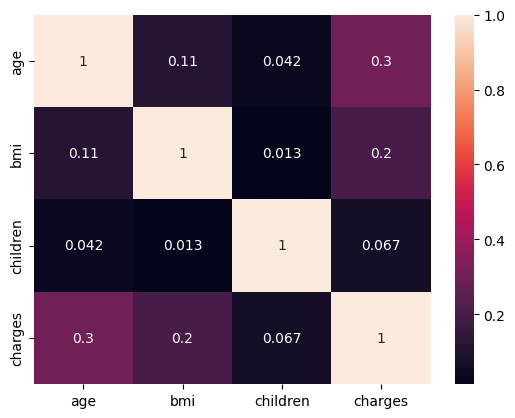

In [97]:
# tương quan giữa các biến numerical
df2 =df[['age','bmi','children','charges']]
sns.heatmap(data = df2.corr(), annot=True);


==> Các cột age, bmi, children ít tương quan với cột charges

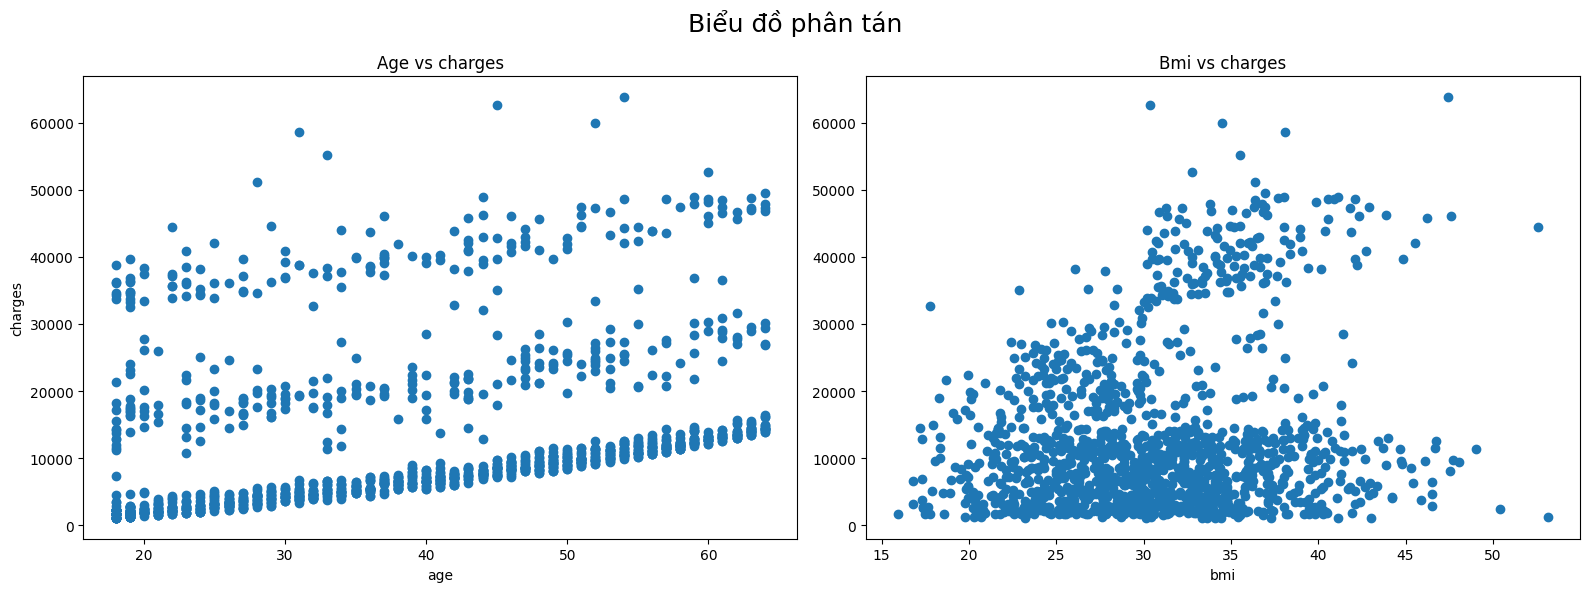

In [98]:
#Subplot 2 biểu đồ/1 figure
fg, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(df['age'],df['charges'],marker='o')
ax[0].set_xlabel('age')
ax[0].set_ylabel('charges')
ax[0].set_title("Age vs charges")

ax[1].scatter(df['bmi'],df['charges'],marker='o')
ax[1].set_xlabel('bmi')
ax[1].set_title("Bmi vs charges")


# ax[2].scatter(df['newspaper'],df['charges'],marker='o')
# ax[2].set_xlabel('Newspaper Ad')
# ax[2].set_title("Newspaper Ad vs Sale")

fg.suptitle('Biểu đồ phân tán', fontsize=18)
plt.tight_layout();

### Phân phối của từng biến

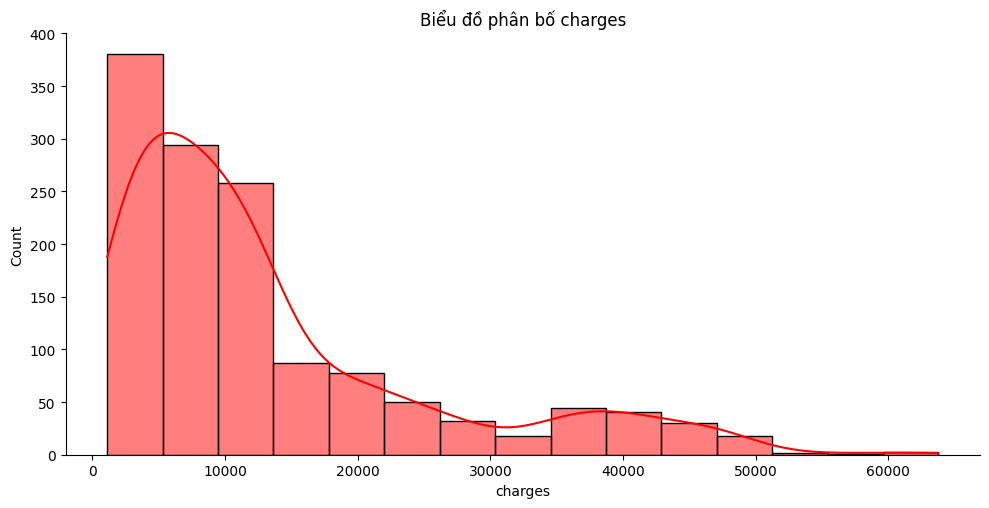

In [ ]:
# xem phân phối cột charges
sns.displot(df['charges'],
            bins=15, #chia 20 khoảng
            aspect=2,
            kde=True,
            color='r')

plt.title('Biểu đồ phân bố charges')
plt.xlabel('charges')
plt.ylabel('Count')
plt.show()

Charges: có phân phối lệch phải, đa phần trả mức phí 10.000. Số lượng người trả mức phí cao >30.000 thấp

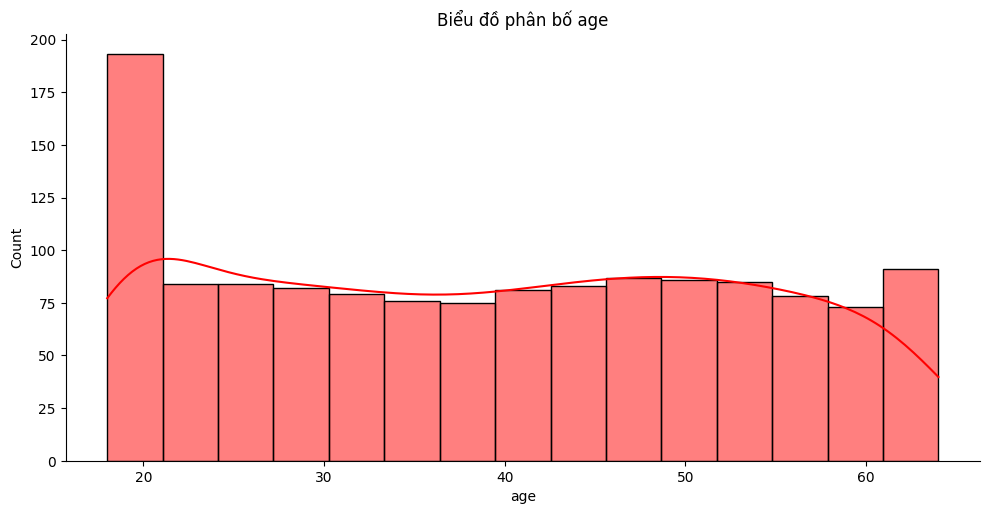

In [ ]:
# xem phân phối cột độ tuổi
sns.displot(df['age'],
            bins=15,
            aspect=2,
            kde=True,
            color='r')

plt.title('Biểu đồ phân bố age')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

Độ tuổi trải dài từ 20-60, số lượng ở độ tuổi 20 nhiều hơn so với các độ tuổi còn lại

In [ ]:
# xem phân phối độ tuổi
# plt.figure(figsize=(10, 6))
# plt.hist(df['age'], bins=15, color='blue', alpha=0.7, edgecolor='black')
# plt.title('Biểu đồ phân phối độ tuổi')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.grid(axis='y', alpha=0.75)
# plt.show()

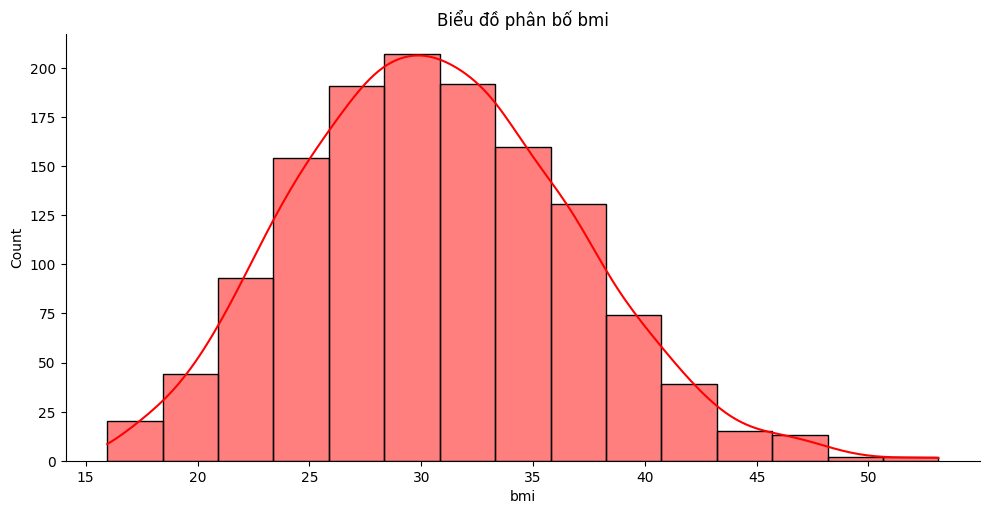

In [ ]:
# xem phân phối cột bmi
sns.displot(df['bmi'],
            bins=15,
            aspect=2,
            kde=True,
            color='r')

plt.title('Biểu đồ phân bố bmi')
plt.xlabel('bmi')
plt.ylabel('Count')
plt.show()

Chỉ số bmi có phân phối chuẩn, tập trung từ 25-35

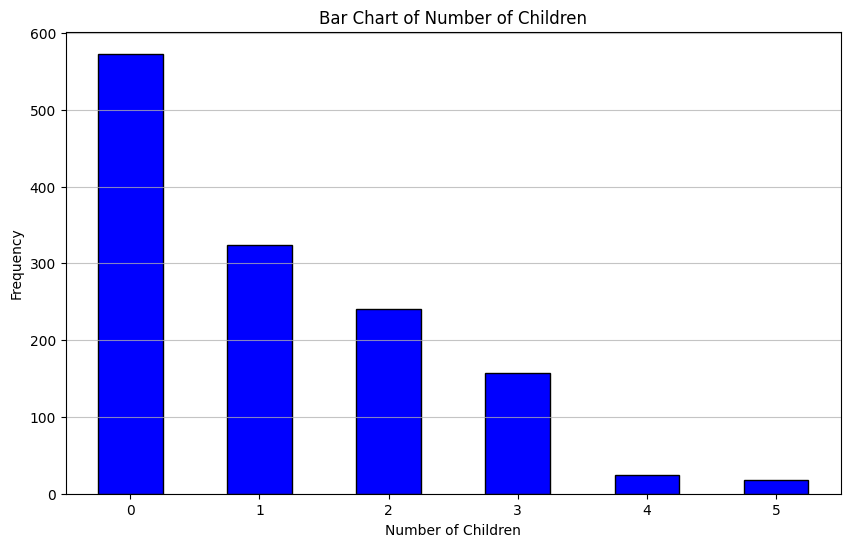

In [ ]:
# xem phân phối cột children
count_data = df['children'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
count_data.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Bar Chart of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Vẽ bằng seaborn
# plt.figure(figsize=(10, 6))
# sns.countplot(data=df, x='children', color='blue')
# plt.title('Bar Chart of Number of Children')
# plt.xlabel('Number of Children')
# plt.ylabel('Frequency')
# plt.grid(axis='y', alpha=0.75)
# plt.show()

Người được bảo hiểm đa phần chưa có con (do tập trung ở độ tuổi 20), hoặc 1-3 con, ít người có 4-5 con

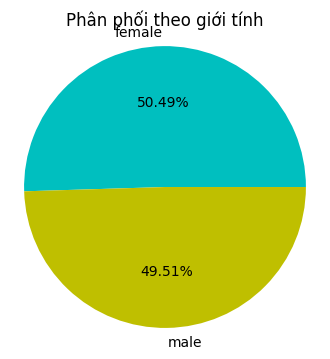

In [ ]:
# xem phân phối giới tính
plt.figure(figsize=(4,4))
plt.pie(df['sex'].value_counts(), labels =df['sex'].unique(), colors= ['c','y'],autopct = '%1.2f%%')
        # ,startangle=15,autopct = '%1.2f%%', explode= [0.1,0.3],pctdistance=0.9,textprops={'fontsize': 14})
plt.title('Phân phối theo giới tính',fontdict= {'fontsize':12})
plt.axis('equal')
plt.show()

Tỷ lệ nam giới và nữ giới xấp xỉ bằng nhau

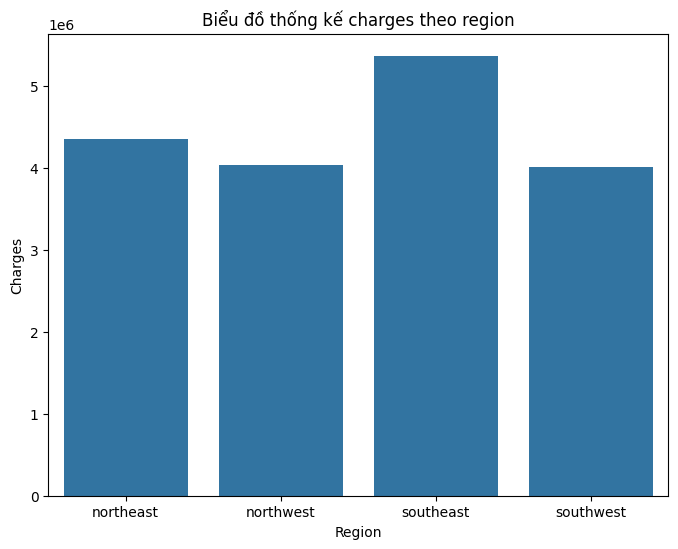

In [66]:
# thống kê charges theo region
plt.figure(figsize=(8,6))
bar_plot= df.groupby("region")['charges'].sum().reset_index()
sns.barplot(data = bar_plot,x= 'region',y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Biểu đồ thống kế charges theo region')
plt.show()

Chi phí bảo hiểm ở southest cao hơn so với các vùng còn lại.  
Chi phí bảo hiểm ở southwest và northwest tương đương nhau

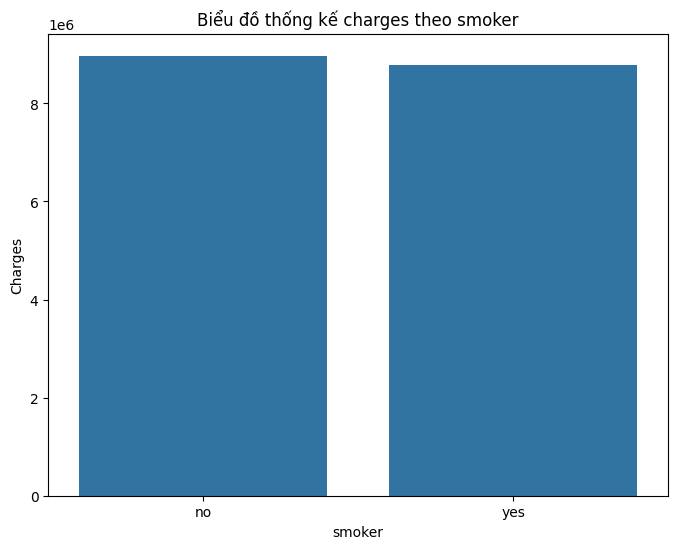

In [67]:
plt.figure(figsize=(8,6))
bar_plot= df.groupby("smoker")['charges'].sum().reset_index()
sns.barplot(data = bar_plot,x= 'smoker',y='charges')
plt.xlabel('smoker')
plt.ylabel('Charges')
plt.title('Biểu đồ thống kế charges theo smoker')
plt.show()

Chi phí bảo hiểm của người hút thuốc va ko hút thuốc tương đương nhau

In [123]:
# f, ax = plt.subplots(1, 1, figsize=(12, 8))
# ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

In [124]:
# f, ax = plt.subplots(1,1, figsize=(12,8))
# ax = sns.barplot(x = 'region', y = 'charges',
#                  hue='smoker', data=df, palette='Reds_r')

## HUẤN LUYỆN

In [99]:
#Biến độc lập
x = df.drop('charges',axis=1)
#Biến phụ thuộc
y = df['charges']

### Chia tập train, test

In [100]:
# phân chia tập train và test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [101]:
x_train.head()

,age,sex,bmi,children,smoker,region
435,60,male,33.110,3,no,southeast
202,60,female,24.035,0,no,northwest
1183,48,female,27.360,1,no,northeast
1291,19,male,34.900,0,yes,southwest
773,19,female,28.880,0,yes,northwest


In [102]:
x_test.head()

,age,sex,bmi,children,smoker,region
629,44,female,38.950,0,yes,northwest
1087,57,male,31.540,0,no,northwest
283,55,female,32.395,1,no,northeast
790,39,female,41.800,0,no,southeast
594,41,male,40.260,0,no,southeast


In [103]:
y_train.head()

,charges
435,13919.82290
202,13012.20865
1183,9447.38240
1291,34828.65400
773,17748.50620


In [104]:
y_test.head()

,charges
629,42983.45850
1087,11353.22760
283,11879.10405
790,5662.22500
594,5709.16440


In [108]:
# classify columns
num_features=['age', 'bmi']
cat_features = ['sex', 'children','smoker','region']

In [110]:
# Define numerical pipeline
num_pipe = Pipeline([('scaler', StandardScaler())
                    ])

# Define categorical pipeline
cat_pipe = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))
                     ])
# Column transformer
tfm = ColumnTransformer(transformers=
    [('cat', cat_pipe, cat_features),
      ('num', num_pipe, num_features)
    ],
    remainder = 'passthrough')

In [111]:
# define pipeline using Linear Regression
final_pipe = Pipeline(steps=[
                       ('preprocessor', tfm),
                       ('model', LinearRegression())
                       ]
                      )

In [113]:
# fit data
final_pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'children', 'smoker',
                                                   'region']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi'])])),
                ('model', LinearRegression())])

In [115]:
# predict
y_pred = final_pipe.predict(x_test)
y_pred

array([36208., 12568., 13896., 11584., 10960.,  2320.,  4528., 11952.,
        9888., 33808., 10296.,  4032., 10520., 10168.,  2824., 13264.,
        3016., 31808., 17336., 15264.,  6016., 18608.,  8832., 11120.,
        7688., 36256.,  9112., 40176.,  5696.,  3840., 16544.,  3680.,
        4936., 11072.,  2176.,  4128., 30344., 10768., 13216., 10016.,
       33952.,  -464., 10232., 33512., 17832., 12728., 14664.,  3744.,
        6376.,  9208., 12728., 13624., 11088., 12584.,  9456.,   648.,
        3088., 14104.,  6656., 15168., 13416., 15976.,  2848.,  4784.,
        6032.,  7440.,  6504., 35920., 12088., 10224., 34456.,   736.,
        2032., -1144., 14016.,   768., 10688.,  3136.,  5184.,  3424.,
       14008., 12472.,  9936., 11336., 36448.,  3168., 24496.,  2736.,
       34496., 10176.,  9728.,  7496.,  6608., 10648.,  4912., 11136.,
       11688., 19096.,  1600.,  7896., 13520., 25600.,  8408., 27336.,
        7680., 10448., 13376., 15688., 12616., -1008., 10904.,  5736.,
      

In [116]:
# đo lường kết quả
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
RSQUARE=final_pipe.score(x,y)
print(MAE)
print(MSE)
print(RMSE)
print(f'Rsquared:{RSQUARE*100:.2f}')

3947.6961910074624
32536457.55945896
5704.073768760268
Rsquared:75.05


## LƯU MODEL

In [117]:
# lưu model
dump(final_pipe, 'insurance.joblib')

['insurance.joblib']

In [118]:
#Load lại model và test
loaded_model = load('insurance.joblib')

In [119]:
# tạo data mới
new_data = [[40,'male',28,2, 'no','southwest']]

In [121]:
new_data = pd.DataFrame(new_data, columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])
new_data

,age,sex,bmi,children,smoker,region
0,40,male,28,2,no,southwest


In [122]:
# dự đoán cho data mới
loaded_model.predict(new_data)

array([8592.])